<a href="https://colab.research.google.com/github/Neethu0207/Market-Analysis/blob/main/EV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

Loading dataset

In [ ]:
df=pd.read_csv('/content/lifestyle.csv')

In [ ]:
df.head(5)

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [ ]:
#knowing the shape
df.shape

(20000, 27)

In [ ]:
#knowing the shape
df.size

540000

Checking for null values

In [ ]:
df.isnull().sum()

,0
Income,0
Age,0
Dependents,0
Occupation,0
City_Tier,0
Rent,0
Loan_Repayment,0
Insurance,0
Groceries,0
Transport,0


In [ ]:
#calculating the total null null values
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
Income,float64
Age,int64
Dependents,int64
Occupation,object
City_Tier,object
Rent,float64
Loan_Repayment,float64
Insurance,float64
Groceries,float64
Transport,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [ ]:
df.describe()

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.158550e+04,41.031450,1.995950,9115.494629,2049.800292,1455.028761,5205.667493,2704.466685,1461.856982,1448.853658,...,4982.878416,10647.367257,912.197183,473.042650,254.963280,254.031058,436.332808,41.524964,62.417083,144.904987
std,4.001454e+04,13.578725,1.417616,9254.228188,4281.789941,1492.938435,5035.953689,2666.345648,1481.660811,1489.019270,...,7733.468188,11740.637289,1038.884968,537.222853,296.047943,299.973590,503.200658,53.152458,98.842656,169.160951
min,1.301187e+03,18.000000,0.000000,235.365692,0.000000,30.002012,154.078240,81.228584,39.437523,45.421469,...,0.000000,-5400.788673,16.575501,8.268076,3.797926,3.121610,6.200297,0.001238,0.000000,2.091973
25%,1.760488e+04,29.000000,1.000000,3649.422246,0.000000,580.204749,2165.426419,1124.578012,581.011801,581.632906,...,1224.932636,3774.894323,317.811000,161.913751,84.506870,84.562090,148.013618,11.037421,4.926210,47.637307
50%,3.018538e+04,41.000000,2.000000,6402.751824,0.000000,1017.124681,3741.091535,1933.845509,1029.109726,1020.198376,...,2155.356763,7224.890977,607.038735,307.045856,164.927660,164.740232,285.739582,25.202124,33.127987,93.090257
75%,5.176545e+04,53.000000,3.000000,11263.940492,2627.142320,1787.160895,6470.892718,3360.597508,1807.075251,1790.104082,...,6216.309609,13331.950716,1128.681837,588.419602,313.398240,310.927935,538.983703,52.353736,80.946145,178.257981
max,1.079728e+06,64.000000,4.000000,215945.674703,123080.682009,38734.932935,119816.898124,81861.503457,34406.100166,38667.368308,...,245504.485208,377060.218482,34894.644404,12273.258242,5573.036433,6222.200913,8081.799518,1394.531049,3647.244243,4637.951137


In [ ]:
#unique values
df.nunique()

,0
Income,20000
Age,47
Dependents,5
Occupation,4
City_Tier,3
Rent,20000
Loan_Repayment,7970
Insurance,20000
Groceries,20000
Transport,20000


In [ ]:
#merging columns
df['Expense Categories']=df['Rent']+df['Insurance']+df['Groceries']+df['Eating_Out']+df['Transport']+df['Entertainment']+df['Utilities']+df['Healthcare']+df['Education']+df['Miscellaneous']


In [ ]:
df['Savings & Potential savings']=df['Desired_Savings_Percentage']+df['Desired_Savings']+df['Potential_Savings_Groceries']+df['Potential_Savings_Transport']+df['Potential_Savings_Eating_Out']+df['Potential_Savings_Entertainment']+df['Potential_Savings_Utilities']+df['Potential_Savings_Healthcare']+df['Potential_Savings_Education']+df['Potential_Savings_Miscellaneous']

In [ ]:
#sum of expense categories
df['Expense Categories'].sum()

np.float64(577766571.1184366)

In [ ]:
df['Savings & Potential savings'].sum()

np.float64(151441932.23987794)

<Axes: >

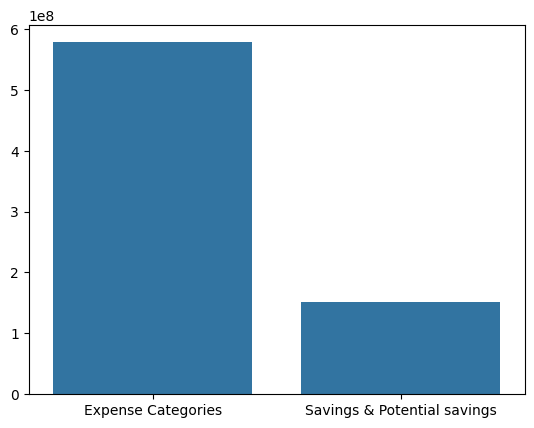

In [ ]:
#comparing the sum through visualization
sns.barplot(x=['Expense Categories','Savings & Potential savings'],y=[df['Expense Categories'].sum(),df['Savings & Potential savings'].sum()])


In [ ]:
fig = px.bar(df,
             x='Occupation',
             y = 'Desired_Savings_Percentage',
             color='Occupation',
             color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']) # Example dark colors
pio.show(fig)

<Axes: ylabel='count'>

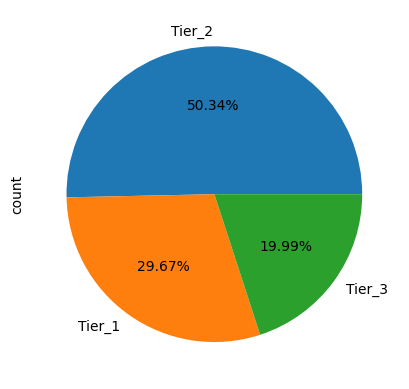

In [ ]:
#classification  of city tier
df['City_Tier'].value_counts().plot(kind = 'pie', autopct ='%.2f%%')

<Axes: xlabel='Dependents', ylabel='count'>

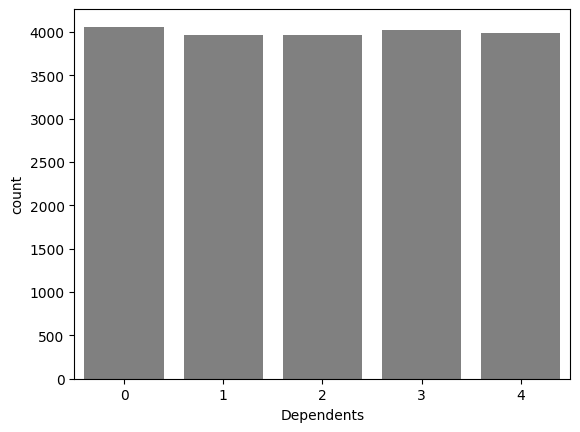

In [ ]:
#visualising dependents
sns.countplot(x = 'Dependents', data = df, color='grey')

<Axes: xlabel='Age', ylabel='Count'>

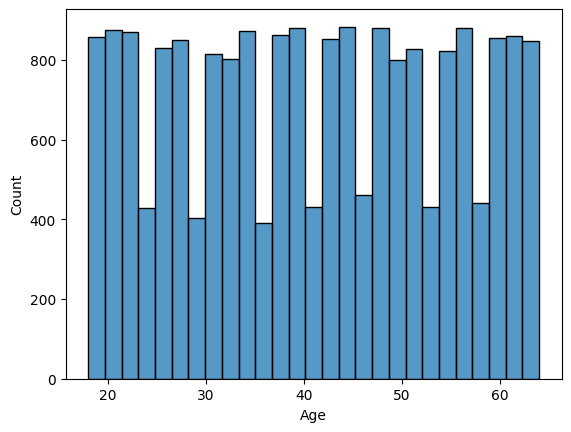

In [ ]:
#visualising using histogram
sns.histplot(df['Age'])

<Axes: xlabel='City_Tier', ylabel='count'>

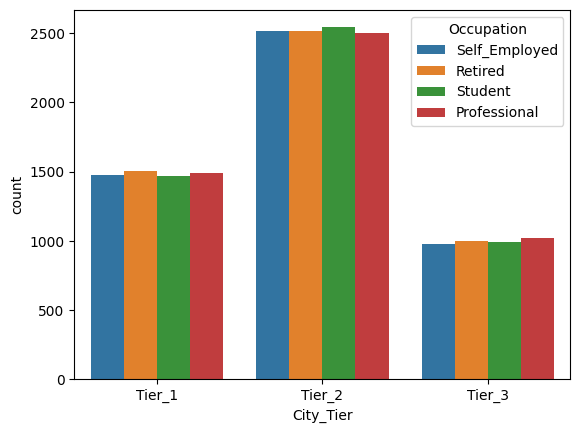

In [ ]:
#frequency distribution of city_tier and occupation
sns.countplot(x = 'City_Tier', data = df, hue = 'Occupation')

<Axes: xlabel='Income', ylabel='Expense Categories'>

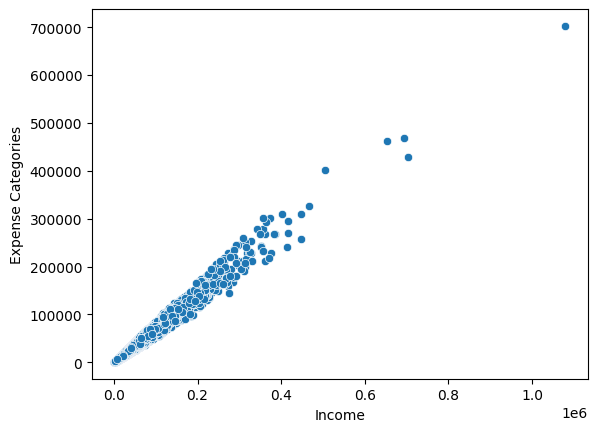

In [ ]:
#income vs expense
sns.scatterplot(x = 'Income', y = 'Expense Categories', data = df)

<Axes: xlabel='Desired_Savings_Percentage', ylabel='Desired_Savings'>

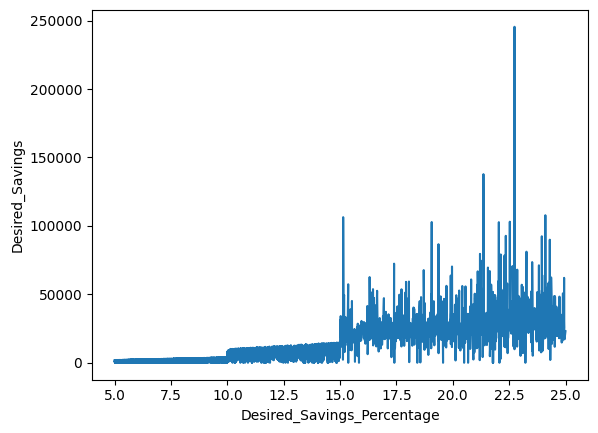

In [ ]:
#relationship between desired saving percentage and desired saving
sns.lineplot(x = 'Desired_Savings_Percentage', y = 'Desired_Savings', data = df)

In [ ]:
# Create a new column 'Income_Category'
df['Income_Category'] = df['Income'].apply(lambda x: 'high income' if x >= 35000 else ('medium income' if x >= 20000 else 'low income'))

# Optional: Display the first few rows to see the new column
# print(df[['Income', 'Income_Category']].head())

<Axes: xlabel='Income_Category', ylabel='Expense Categories'>

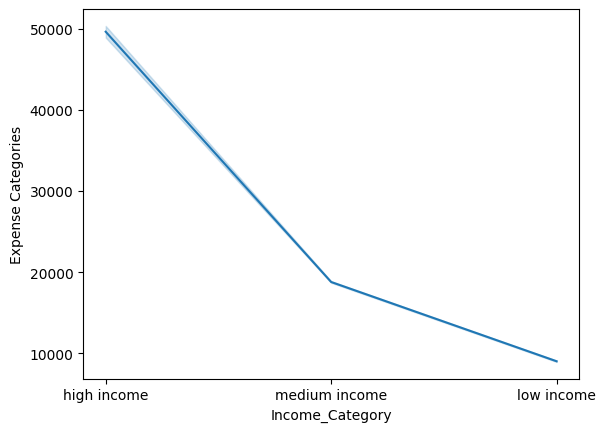

In [ ]:
#visualing based on income using line plot
sns.lineplot(x = 'Income_Category', y = 'Expense Categories', data = df)

In [ ]:
#grouping age
Age=df.groupby('Age')

In [ ]:
# Function to classify age into groups
def classify_age(age):
    if 13 <= age <= 19:
        return "13-19"
    elif 20 <= age <= 24:
        return "20-24"
    elif 25 <= age <= 29:
        return "25-29"
    elif 30 <= age <= 34:
        return "30-34"
    elif 35 <= age <= 39:
        return "35-39"
    elif 40 <= age <= 44:
        return "40-44"
    elif 45 <= age <= 49:
        return "45-49"
    elif 50 <= age <= 54:
        return "50-54"
    elif 55 <= age <= 59:
        return "55-59"
    elif 60 <= age <= 64:
        return "60-64"
    elif 65 <= age <= 69:
        return "65-69"
    elif 70 <= age <= 74:
        return "70-74"
    elif 75 <= age <= 79:
        return "75-79"
    elif 80 <= age <= 84:
        return "80-84"
    elif 85 <= age <= 89:
        return "85-89"
    elif 90 <= age <= 94:
        return "90-94"
    elif 95 <= age <= 99:
        return "95-99"
    else:
        return "Outside defined range"

# Apply the function to the 'Age' column to create a new 'Age_Group' column
df['Age_Group'] = df['Age'].apply(classify_age)

# Optional: Display the first few rows to see the new column
# print(df[['Age', 'Age_Group']].head())

# You can now use the 'Age_Group' column for further analysis or visualization
# For example, to see the distribution of age groups:
# print(df['Age_Group'].value_counts())

<Axes: xlabel='Age_Group', ylabel='count'>

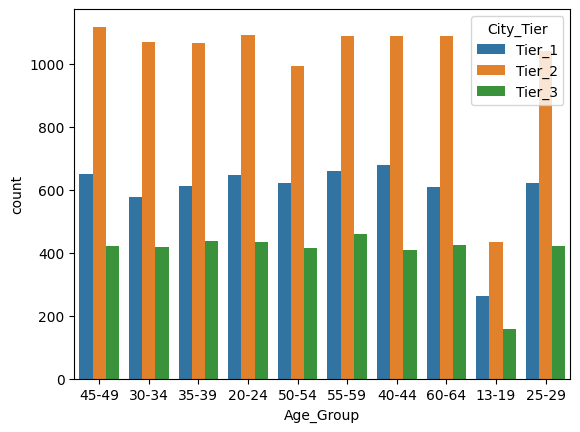

In [ ]:
#visualising age group and city tier
sns.countplot(x = 'Age_Group', data = df, hue = 'City_Tier')


<Axes: xlabel='Age_Group', ylabel='Income'>

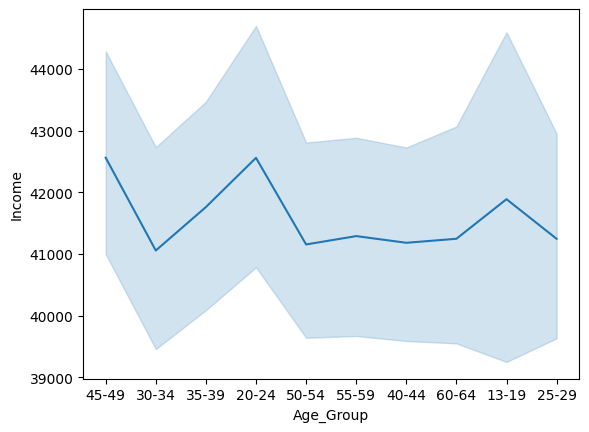

In [ ]:
#visualising age group and income
sns.lineplot(x = 'Age_Group', y = 'Income', data = df)


In [ ]:
#calculating average spending of each agegroup
df.groupby('Age_Group')['Expense Categories'].mean()


,Expense Categories
Age_Group,
13-19,29121.050904
20-24,29492.204543
25-29,28658.915155
30-34,28531.861995
35-39,29080.324417
40-44,28809.968495
45-49,29606.175414
50-54,28556.312670
55-59,28570.922357


In [ ]:
#extracing the more spent occupation
df.groupby('Occupation')['Expense Categories'].mean()

,Expense Categories
Occupation,
Professional,29188.624162
Retired,28222.097459
Self_Employed,29075.717543
Student,29069.873927


<Axes: xlabel='Occupation', ylabel='Expense Categories'>

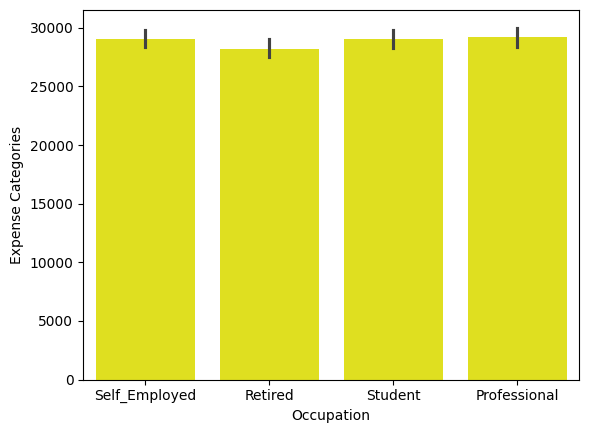

In [ ]:
#visualising using bargraph

sns.barplot(x = 'Occupation', y = 'Expense Categories', data = df,color='yellow')

In [ ]:
#calculating  total expense for each individual
df['Expense Categories']

,Expense Categories
0,33371.621929
1,17181.777859
2,31864.051073
3,63028.205206
4,15496.973617
...,...
19995,32046.292973
19996,59570.597468
19997,30247.049523
19998,95208.221888


In [ ]:
#correlation between income and entertainment
df['Income'].corr(df['Entertainment'])


np.float64(0.9396726928661815)

In [ ]:
df['Savings & Potential savings'].corr(df['Income'])



np.float64(0.96626683581221)

In [ ]:

df['Actual_Savings']=df['Desired_Savings']-df['Expense Categories']
print(df['Actual_Savings'])



0       -27171.084736
1       -15258.601425
2       -24813.690651
3       -46333.240069
4       -13622.874183
             ...     
19995   -30882.974662
19996   -48957.007870
19997   -27979.144389
19998   -84604.537075
19999    -5696.973500
Name: Actual_Savings, Length: 20000, dtype: float64


<Axes: xlabel='Occupation', ylabel='Actual_Savings'>

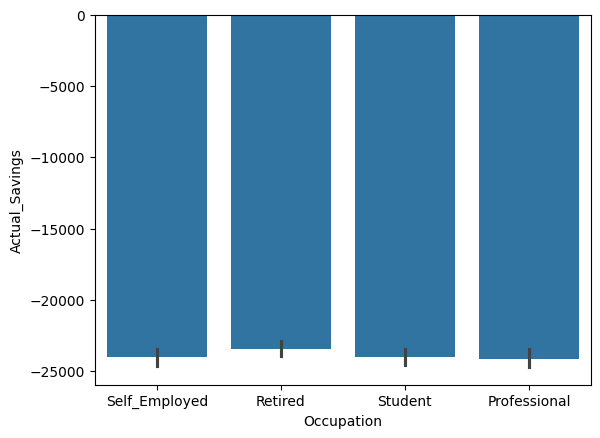

In [ ]:
#visualising
sns.barplot(x = 'Occupation', y = 'Actual_Savings', data = df)

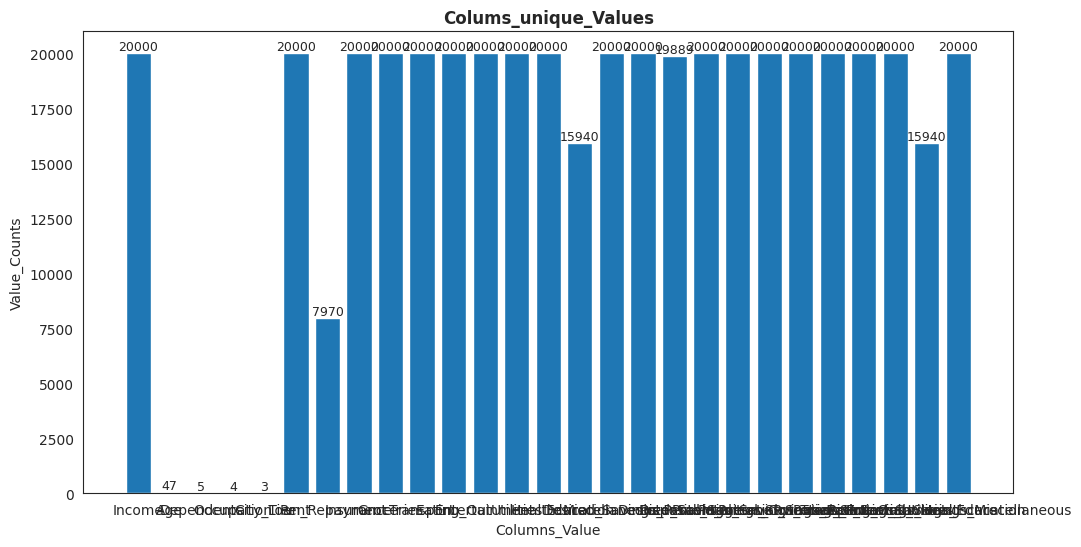

In [ ]:
plt.figure(figsize = (12,6))# use plt.figure to create a figure
sns.set_style("white")

unique_columns_counts = df.nunique().values

bars = plt.bar(df.columns,unique_columns_counts)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             str(bar.get_height()), ha='center', va='bottom', fontsize=9)
plt.title("Colums_unique_Values", fontweight = "bold")
plt.xlabel("Columns_Value")
plt.ylabel("Value_Counts")
plt.show()